<a href="https://colab.research.google.com/github/SanghunOh/study_machinglearning/blob/main/codes/yanginsuk/EM_GaussianMix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 가우시안 확률분포 모델
: 하나의 클래스 혹은 관찰된 전체 데이터 집합이 평균을 중심으로 하여 뭉처져있는  분포 형태를 표현하는데 적합한 확률모델

문제점 : 기본적으로 데이터들이 평균을 중심으로 하나의 그룹으로 뭉쳐있는 유니모달(unimodal) 형태를 가진다는것을 가정하고 있어서 복잡한 형태를 가지는 데이터의 확률밀도 함수를 표현하기 힘들다




In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
import scipy.io
mat = scipy.io.loadmat('/content/gdrive/My Drive/MyColab/Data/data10_2.mat')

In [13]:
X=mat.get('data')
X=X.T


In [14]:
def gausspdf(X, mu, sigma):
  n = X.shape[0]
  N = X.shape[1]
  Mu = np.matlib.repmat(np.reshape(mu,(-1,1)),1,N)
  #print(Mu.shape)
  res = (1 / ((np.sqrt(2*np.pi))**n * np.sqrt(np.linalg.det(sigma)))) \
        * np.exp(-np.diag((X-Mu).T @ np.linalg.inv(sigma) @(X-Mu)) / 2)
  #print(np.exp(1))
  return res

In [15]:
import numpy.matlib
import math

def gausspdf2(X, mu, sigma):
  #n=size(X,1);                            % 입력 벡터의 차원
  n=X[0,:].size
  #N=size(X,2);                            % 데이터의 수
  N=X[1,:].size
  #Mu=repmat(mu',1,N);                     % 행렬 연산을 위한 준비
  mu = mu.reshape(2,1)
  Mu = np.matlib.repmat(mu, 1, N)
  #% 확률 밀도값 계산
  #out = (1/((sqrt(2*pi))^n*sqrt(det(sigma))))*exp(-diag((X-Mu)'*inv(sigma)*(X-Mu))/2);
  XX= X-Mu
  YY = np.linalg.inv(sigma)
  ZZ = YY.dot(XX)
  return (1/(pow(math.sqrt(2*math.pi),n)*math.sqrt(np.linalg.det(sigma))))*np.exp(-np.diag((XX.T).dot(ZZ))/2)
  
  #XX= X-Mu
  #YY = np.linalg.inv(sigma)
  #ZZ = XX.dot(YY)
  #return (1/(pow(math.sqrt(2*math.pi),n)*math.sqrt(np.linalg.det(sigma))))*np.exp(-np.diag(ZZ.dot(XX.T))/2)
  #return (1/(pow(math.sqrt(2*math.pi),n)*math.sqrt(np.linalg.det(Sigma))))*np.exp(-np.diag((X-Mu)*np.linalg.inv(sigma)*(X-Mu))/2)
  #return (1/ np.sqrt(2*np.pi * sigma**2))*np.exp(- (X-mu)**2/(2*sigma**2))

In [16]:
import matplotlib.pyplot as plt
import tensorflow as tf

def drawgraph(X, Mu, Sigma, cnt):
  M=Mu[:,1].size
  print("Mu=",Mu)
  plt.figure(num=cnt)
  plt.plot(X[0,:], X[1,:], marker='*', linestyle='None')
  plt.axis([-0.5, 5.5, -0.5, 3.5])
  plt.plot(Mu[:,0], Mu[:,1], marker='o', linestyle='None')
  print("M=",M)
  for j in range(M):
    print("j=",j)
    sigma = np.asarray(np.reshape(Sigma[j,:,:],(2,2)))
    print("sigma=",sigma)
    t=np.arange(-math.pi,math.pi,0.1)
    #A=math.sqrt(2)*[math.cos(t), math.sin(t)]*scipy.linalg.sqrtm(sigma)+ np.matlib.repmat(Mu[j-1,:],t.size,1)
    A=math.sqrt(2)*np.asarray([np.cos(t), np.sin(t)]).T.dot(scipy.linalg.sqrtm(sigma))+ np.matlib.repmat(Mu[j,:],t.size,1)
    plt.plot(A[:,0], A[:,1], marker='^', linestyle='None')
  plt.show()
  #figure(cnt);                            % 데이터 그리기
  #plot(X(1,:), X(2,:), '*'); hold on
  #axis([-0.5 5.5 -0.5 3.5]); grid on
  #plot(Mu(:,1), Mu(:,2), 'r*');            % 평균 파라미터 그리기
  #for j=1:M
  #  sigma = reshape(Sigma(j,:,:),2,2);  % 공분산에 따른 타원 그리기
  #  t=[-pi:0.1:pi]';
  #  A=sqrt(2)*[cos(t) sin(t)]*sqrtm(sigma)+repmat(Mu(j,:), size(t),1);
  #  plot(A(:,1), A(:,2), 'r-', 'linewidth', 2);
  #endfor

Mu= [[3.29502139 0.34256927]
 [1.35165584 1.84016315]
 [4.98062479 3.61850382]
 [0.28104961 4.18118224]
 [4.33399596 2.34741867]
 [3.14836299 4.46959105]]
M= 6
j= 0
sigma= [[1. 0.]
 [0. 1.]]
j= 1
sigma= [[1. 0.]
 [0. 1.]]
j= 2
sigma= [[1. 0.]
 [0. 1.]]
j= 3
sigma= [[1. 0.]
 [0. 1.]]
j= 4
sigma= [[1. 0.]
 [0. 1.]]
j= 5
sigma= [[1. 0.]
 [0. 1.]]


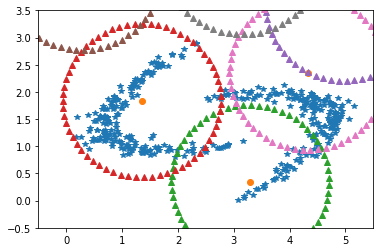

In [17]:
import numpy as np
import tensorflow as tf
#type(X.size)
#type(int(X.shape[0]))
#N=int(X.shape[0])         # 데이터의 수
#M=6;                      # 가우시안 성분의 수
#Mu=np.random.rand(M, 2)*5

#np_arr = np.array([[[1,0],[0,1]],[[1,0],[0,1]],[[1,0],[0,1]],[[1,0],[0,1]],[[1,0],[0,1]],[[1,0],[0,1]]])
#Sigma = np_arr

N = X.shape[1]
M = 6
Mu = np.random.rand(M,2)*5
Sigma = np.zeros([6,2,2])
for i in range(M):
  Sigma[i,:,:] = [[1,0],[0,1]]
alpha = (np.zeros([6,1])+1)/6



drawgraph(X,Mu, Sigma,1);                   # 그래프 그리기 함수 호출

Mu= [[3.44973807 0.99582546]
 [1.12866466 1.48589468]
 [4.41858034 1.71601513]
 [1.28122991 2.10829638]
 [4.31065808 1.63879324]
 [2.76211832 2.20507944]]
M= 6
j= 0
sigma= [[0.88616239 0.02535462]
 [0.02535462 0.31431388]]
j= 1
sigma= [[0.28659632 0.05337352]
 [0.05337352 0.26827255]]
j= 2
sigma= [[ 0.18149625 -0.05870061]
 [-0.05870061  0.04991912]]
j= 3
sigma= [[0.23996957 0.22187377]
 [0.22187377 0.2323544 ]]
j= 4
sigma= [[ 0.28931237 -0.07225592]
 [-0.07225592  0.10559407]]
j= 5
sigma= [[ 0.94514354 -0.29688192]
 [-0.29688192  0.16961513]]


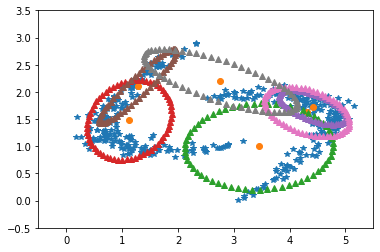

Mu= [[3.40507248 0.69875279]
 [1.05084883 1.09545969]
 [4.48940913 1.79804017]
 [1.13411659 2.0080091 ]
 [4.58937895 1.48342059]
 [3.29422226 1.9488754 ]]
M= 6
j= 0
sigma= [[ 0.52635232 -0.05706173]
 [-0.05706173  0.0954817 ]]
j= 1
sigma= [[ 0.18556133 -0.05102391]
 [-0.05102391  0.03268349]]
j= 2
sigma= [[ 0.10831878 -0.02965512]
 [-0.02965512  0.01857083]]
j= 3
sigma= [[0.21089842 0.1813162 ]
 [0.1813162  0.16907667]]
j= 4
sigma= [[ 0.05005695 -0.01692961]
 [-0.01692961  0.06042281]]
j= 5
sigma= [[0.18545223 0.01055232]
 [0.01055232 0.00360271]]


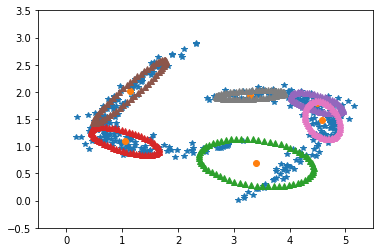

Mu= [[3.2592553  0.65150476]
 [1.11384332 1.05980041]
 [4.37895204 1.81131984]
 [1.09100106 1.95746027]
 [4.64556782 1.32010827]
 [3.27696441 1.95022079]]
M= 6
j= 0
sigma= [[ 0.38624566 -0.10305254]
 [-0.10305254  0.10746394]]
j= 1
sigma= [[ 0.20281624 -0.04460141]
 [-0.04460141  0.02260206]]
j= 2
sigma= [[ 0.07481976 -0.01534735]
 [-0.01534735  0.01504847]]
j= 3
sigma= [[0.2145092  0.18891929]
 [0.18891929 0.18261329]]
j= 4
sigma= [[0.0551045  0.05187087]
 [0.05187087 0.07459921]]
j= 5
sigma= [[0.18103847 0.011554  ]
 [0.011554   0.00358118]]


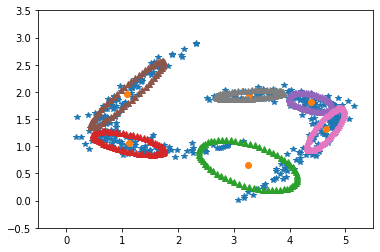

Mu= [[2.84367363 0.73102425]
 [1.11758302 1.05794959]
 [4.42292876 1.78696815]
 [1.08852584 1.95440423]
 [4.4491696  1.10980747]
 [3.29154429 1.95030384]]
M= 6
j= 0
sigma= [[ 0.17947156 -0.11360018]
 [-0.11360018  0.14657256]]
j= 1
sigma= [[ 0.20104855 -0.04431144]
 [-0.04431144  0.02225309]]
j= 2
sigma= [[ 0.07946428 -0.01957745]
 [-0.01957745  0.01930783]]
j= 3
sigma= [[0.21497679 0.18961722]
 [0.18961722 0.18378419]]
j= 4
sigma= [[0.16323083 0.1536352 ]
 [0.1536352  0.16376409]]
j= 5
sigma= [[0.1871685  0.0113912 ]
 [0.0113912  0.00355713]]


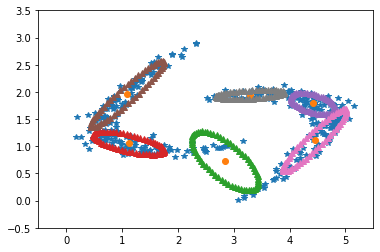

Mu= [[2.56826451 0.96994412]
 [1.09221477 1.06356175]
 [4.4758671  1.74581718]
 [1.0887259  1.95479002]
 [4.28891112 0.95143113]
 [3.3052967  1.94994747]]
M= 6
j= 0
sigma= [[0.08911122 0.01272432]
 [0.01272432 0.00355161]]
j= 1
sigma= [[ 0.17852687 -0.04119648]
 [-0.04119648  0.02248554]]
j= 2
sigma= [[ 0.08217807 -0.02568543]
 [-0.02568543  0.02758556]]
j= 3
sigma= [[0.21551974 0.19018762]
 [0.19018762 0.18423619]]
j= 4
sigma= [[0.2580893  0.22587286]
 [0.22587286 0.21336437]]
j= 5
sigma= [[0.19278411 0.01097535]
 [0.01097535 0.00354099]]


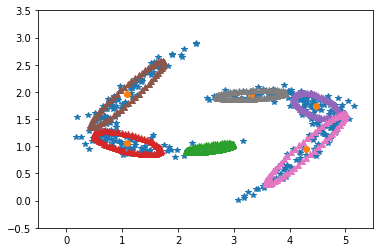

Mu= [[2.60012142 0.96813981]
 [1.10541831 1.06347956]
 [4.50360569 1.72364801]
 [1.09153235 1.95842531]
 [4.25245476 0.91103737]
 [3.32937767 1.94981316]]
M= 6
j= 0
sigma= [[0.07787876 0.01384296]
 [0.01384296 0.00347477]]
j= 1
sigma= [[ 0.19377526 -0.04165312]
 [-0.04165312  0.02251672]]
j= 2
sigma= [[ 0.07877913 -0.02661654]
 [-0.02661654  0.03108783]]
j= 3
sigma= [[0.21476436 0.18899061]
 [0.18899061 0.18239966]]
j= 4
sigma= [[0.25823336 0.22239478]
 [0.22239478 0.20631508]]
j= 5
sigma= [[0.20281104 0.01057655]
 [0.01057655 0.00361626]]


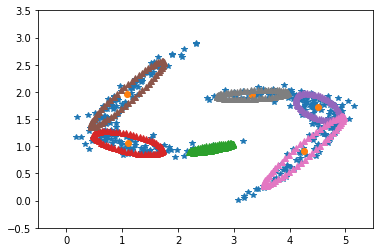

Mu= [[2.60251229 0.96823476]
 [1.10692814 1.06298915]
 [4.51289545 1.71704387]
 [1.09127541 1.95814728]
 [4.24248077 0.90038428]
 [3.34319917 1.94955036]]
M= 6
j= 0
sigma= [[0.07706548 0.01386923]
 [0.01386923 0.00349535]]
j= 1
sigma= [[ 0.194867   -0.04158945]
 [-0.04158945  0.0223778 ]]
j= 2
sigma= [[ 0.0766053  -0.02630802]
 [-0.02630802  0.03180351]]
j= 3
sigma= [[0.21472759 0.1889281 ]
 [0.1889281  0.18236079]]
j= 4
sigma= [[0.25776625 0.22103069]
 [0.22103069 0.20413761]]
j= 5
sigma= [[0.20870028 0.01024799]
 [0.01024799 0.00366869]]


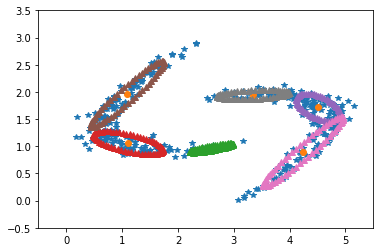

Mu= [[2.60252142 0.96823652]
 [1.10696587 1.06296855]
 [4.51642034 1.71464312]
 [1.09124567 1.95811125]
 [4.23932101 0.89703914]
 [3.34952508 1.94941753]]
M= 6
j= 0
sigma= [[0.07706241 0.0138686 ]
 [0.0138686  0.00349519]]
j= 1
sigma= [[ 0.1948638  -0.04158316]
 [-0.04158316  0.02237187]]
j= 2
sigma= [[ 0.07562485 -0.02608984]
 [-0.02608984  0.03199884]]
j= 3
sigma= [[0.21473201 0.18893463]
 [0.18893463 0.18237251]]
j= 4
sigma= [[0.25760103 0.22058959]
 [0.22058959 0.20345113]]
j= 5
sigma= [[0.21143566 0.01008781]
 [0.01008781 0.00369131]]


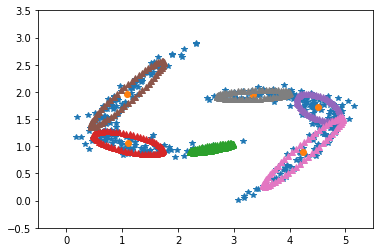

Mu= [[2.60252201 0.96823665]
 [1.10696793 1.06296743]
 [4.51780501 1.71370548]
 [1.09124407 1.95810931]
 [4.23814527 0.89579755]
 [3.35214296 1.94936352]]
M= 6
j= 0
sigma= [[0.07706221 0.01386855]
 [0.01386855 0.00349517]]
j= 1
sigma= [[ 0.19486366 -0.04158284]
 [-0.04158284  0.02237156]]
j= 2
sigma= [[ 0.07522702 -0.02599194]
 [-0.02599194  0.03206655]]
j= 3
sigma= [[0.21473226 0.18893499]
 [0.18893499 0.18237315]]
j= 4
sigma= [[0.25753753 0.22042426]
 [0.22042426 0.20319569]]
j= 5
sigma= [[0.2125761  0.01002126]
 [0.01002126 0.00370019]]


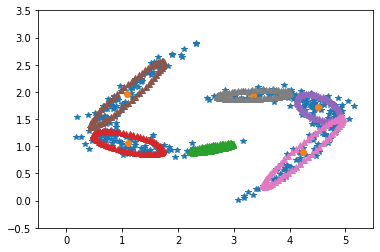

Mu= [[2.60252204 0.96823666]
 [1.10696804 1.06296737]
 [4.51834984 1.71333606]
 [1.09124398 1.95810921]
 [4.23768662 0.89531358]
 [3.35318669 1.9493423 ]]
M= 6
j= 0
sigma= [[0.07706219 0.01386855]
 [0.01386855 0.00349517]]
j= 1
sigma= [[ 0.19486365 -0.04158282]
 [-0.04158282  0.02237154]]
j= 2
sigma= [[ 0.07506997 -0.02595211]
 [-0.02595211  0.03209231]]
j= 3
sigma= [[0.21473227 0.18893501]
 [0.18893501 0.18237318]]
j= 4
sigma= [[0.25751215 0.22035924]
 [0.22035924 0.20309565]]
j= 5
sigma= [[0.2130321  0.00999477]
 [0.00999477 0.00370364]]


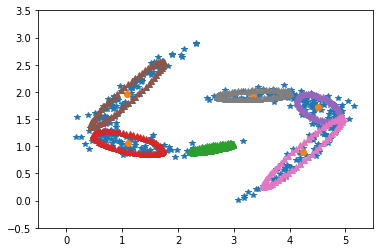

Mu= [[2.60252204 0.96823666]
 [1.10696805 1.06296737]
 [4.51853542 1.71321005]
 [1.09124398 1.95810921]
 [4.23753033 0.89514871]
 [3.35354334 1.9493351 ]]
M= 6
j= 0
sigma= [[0.07706219 0.01386855]
 [0.01386855 0.00349517]]
j= 1
sigma= [[ 0.19486365 -0.04158282]
 [-0.04158282  0.02237154]]
j= 2
sigma= [[ 0.07501652 -0.02593843]
 [-0.02593843  0.03210102]]
j= 3
sigma= [[0.21473227 0.18893501]
 [0.18893501 0.18237318]]
j= 4
sigma= [[0.2575034  0.22033699]
 [0.22033699 0.20306147]]
j= 5
sigma= [[0.21318808 0.00998572]
 [0.00998572 0.00370481]]


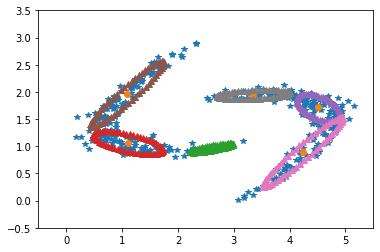

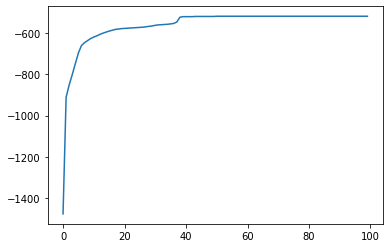

In [18]:
Maxtau = 100
px = np.zeros([M,N]) #(6*400)
r = np.empty([N,M]) #(400*6)
L = np.arange(0,100)

for tau in range(Maxtau):
  # E-step
  for j in range(M):
    px[j,:] = gausspdf(X, Mu[j,:], np.reshape(Sigma[j,:,:],(2,2)))
  sump=px.T @ alpha
  for j in range(M):
    r[:,j] = np.reshape((np.reshape((alpha[j] * px[j,:]),(-1,1)) / sump),(-1));
  L[tau] = sum(np.log(sump))
  for j in range(M):
    sumr=sum(r[:,j])
    Rj = np.matlib.repmat(r[:,j],2,1)
    Mu[j,:] = np.sum(Rj * X, axis=1) / sumr
    rxmu = (X - np.matlib.repmat(Mu[j,:],N,1).T) * Rj
    Sigma[j,:,:] = rxmu @ \
                  (X - np.matlib.repmat(Mu[j,:],N,1).T).T / sumr
    alpha[j] = sumr/N
  if (np.mod(tau, 10) == 1):
    drawgraph(X, Mu, Sigma, np.ceil(tau/10)+1)

drawgraph(X, Mu, Sigma, tau)
plt.plot(L)